In [1]:
from probe_experiment import *
from handcrafted_datasets import Dataset
from models import *
import torch
import torch.nn as nn
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dataset = Dataset('result', 'C:\\Users\\andre\\go-ai\\data', 0.8, 0.2, 1024)

def get_train_loader():
    dataset.shuffle('train')
    return dataset.loader('train', max_ram_files=25)

def get_test_loader():
    return dataset.loader('test', max_ram_files=25)

done loading data
split sizes:
train 552
test 138


In [3]:
def unsqueezeBCE(pred, target):
    return torch.nn.BCEWithLogitsLoss()(pred, target.unsqueeze(dim=1))
criterion = unsqueezeBCE

In [4]:
go_model = load_go_model_from_ckpt('model_ckpt.pth.tar', rm_prefix=True)
feat_models = [CutModel(go_model, i).cuda() for i in range(8)]
n_channels = [8, 64, 64, 64, 48, 48, 32, 32]
probe_models = [nn.Sequential(nn.Flatten(), nn.Dropout(), nn.Linear(nc*19*19, 1)).cuda() for nc in n_channels]

In [5]:
aucs = []
for depth in range(0, 8):
    print('probing at depth %d' % depth)
    feat_model = feat_models[depth]
    probe_model = probe_models[depth]
    exp = ProbeExperiment(get_train_loader, get_test_loader, feat_model)
    config = {'name':'result/result_dropout_d%d'%depth, 'write_log':True, 'progress_bar':True, 'save_ckpt':False}
    optimizer = torch.optim.Adam(probe_model.parameters(), lr=0.001)
    exp.run(probe_model, criterion, optimizer, 5, config)
    preds, labels = exp.get_predictions(probe_model, get_test_loader())
    auc = roc_auc_score(labels, preds)
    aucs.append(auc)
    print(auc)

probing at depth 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:40<00:00, 13.77it/s]


[LOG] epoch 0 loss 0.677637, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.677674


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.677834


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.680106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:31<00:00, 17.80it/s]


[LOG] epoch 4 loss 0.680202


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.601711707276323
probing at depth 1


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.752145, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.807757


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.746482, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.757617


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:35<00:00, 15.36it/s]


[LOG] epoch 4 loss 0.769634


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.6125874551278128
probing at depth 2


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.697700, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.701702


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.696806, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.728259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:51<00:00, 10.71it/s]


[LOG] epoch 4 loss 0.714607


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.6336139084255622
probing at depth 3


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.809510, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.810048


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.777134, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.849470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:06<00:00,  8.32it/s]


[LOG] epoch 4 loss 0.871425


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.623946256472485
probing at depth 4


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.685642, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.694399


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.739426


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.695890


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:19<00:00,  6.99it/s]


[LOG] epoch 4 loss 0.750938


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.6414116219117939
probing at depth 5


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.675658, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.680170


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.679784


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.683658


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:35<00:00,  5.80it/s]


[LOG] epoch 4 loss 0.683348


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.6198896285910326
probing at depth 6


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.686017, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.686574


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.687932


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.690107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:36<00:00,  5.69it/s]


[LOG] epoch 4 loss 0.689252


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

0.5699166932586157
probing at depth 7


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 0 loss 0.685666, new best


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 1 loss 0.685732


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 2 loss 0.686385


  0%|                                                                                                                                    | 0/552 [00:00<?, ?it/s]

[LOG] epoch 3 loss 0.686771


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 552/552 [01:33<00:00,  5.91it/s]


[LOG] epoch 4 loss 0.687312
0.5701955570549986


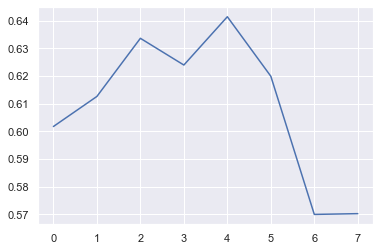

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.plot(aucs)